In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import datetime
from IPython import display
import matplotlib.pyplot as plt

from ipywidgets import widgets
from ipywidgets.widgets import interact, interactive, fixed
from ipywidgets import *
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
forecast = pd.read_csv("forecast_june_2016.csv", index_col=0)
trips_from_region = pd.read_csv("trips_from_region.csv", index_col=0)

In [3]:
trips_from_region = trips_from_region.loc[forecast.index]
trips_from_region.index = pd.to_datetime(trips_from_region.index)
forecast.index = pd.to_datetime(forecast.index)

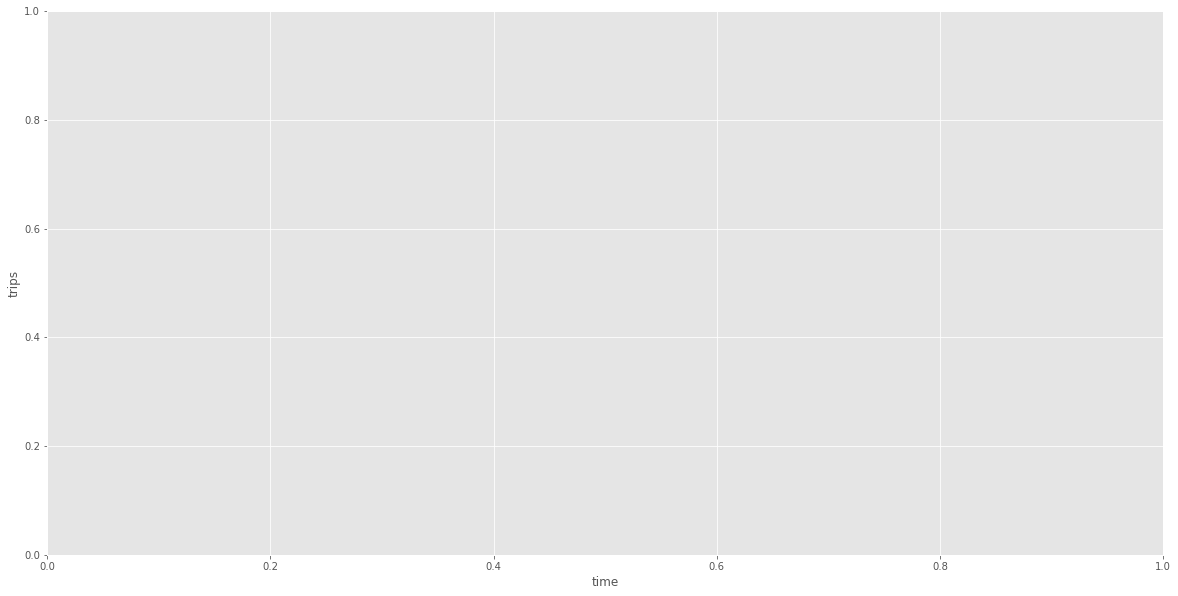

In [353]:
plt.Figure(figsize(20,10))
plt.xlabel('time')
plt.ylabel('trips')

In [7]:
plt.Figure(figsize(20,10))
plt.xlabel('time')
plt.ylabel('trips')

def plt_graph(sender):   
    dt = pd.to_datetime(wg_time_selector.value)
    region = wg_region.value
    start = dt - datetime.timedelta(hours = 24)
    end = dt + datetime.timedelta(hours = 24)   
    
    #x = trips_from_region.loc[start:end].index
    #data1 = trips_from_region.loc[start:end, region].values    
    #data2 = forecast.loc[start:end, region+'_1h'].shift(1).values  
    
    x = trips_from_region.index
    data1 = trips_from_region.values    
    data2 = forecast[region+'_1h'].shift(1).values 
    
    display.clear_output()
    
    plt.plot(x, data1, label = u'данные')    
    plt.plot(x, data2, label = u'прогноз')
    plt.xticks(x)
    
    plt.legend()
    #plt.draw()
    plt.show()

wg_region = widgets.Dropdown(
    options = list(trips_from_region.columns.values),
    description = 'Region: ',
    layout=Layout(width='20%')
)

wg_region.observe(plt_graph)

wg_date = widgets.Dropdown(
    options = list(trips_from_region.index),
    description = 'Date: '
)

wg_plot_graph = widgets.Button(
    description='Plot graph',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''    
    icon='check'
)
wg_plot_graph.on_click(plt_graph)

options = [(i.strftime("%d-%m-%Y %H:%M"), i) for i in trips_from_region.index]
wg_time_selector = widgets.SelectionSlider(
    options=options,#list(trips_from_region.index.values.astype(str)),  
    description='Time ',
    index=(0,trips_from_region.shape[0]),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    layout=Layout(width='70%')
)

#wg_time_selector.observe(plt_graph)

box = widgets.HBox([wg_region, wg_time_selector])
display.display(box)
plt.show()

In [361]:
wg_region = widgets.Dropdown(
    options = list(trips_from_region.columns.values),
    description = 'Region: ',
    layout=Layout(width='20%')
)

wg_region.observe(plt_graph)

wg_date = widgets.Dropdown(
    options = list(trips_from_region.index),
    description = 'Date: '
)

wg_plot_graph = widgets.Button(
    description='Plot graph',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''    
    icon='check'
)
wg_plot_graph.on_click(plt_graph)

options = [(i.strftime("%d-%m-%Y %H:%M"), i) for i in trips_from_region.index]
wg_time_selector = widgets.SelectionSlider(
    options=options,#list(trips_from_region.index.values.astype(str)),  
    description='Time ',
    index=(0,trips_from_region.shape[0]),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    layout=Layout(width='70%')
)

wg_time_selector.observe(plt_graph)

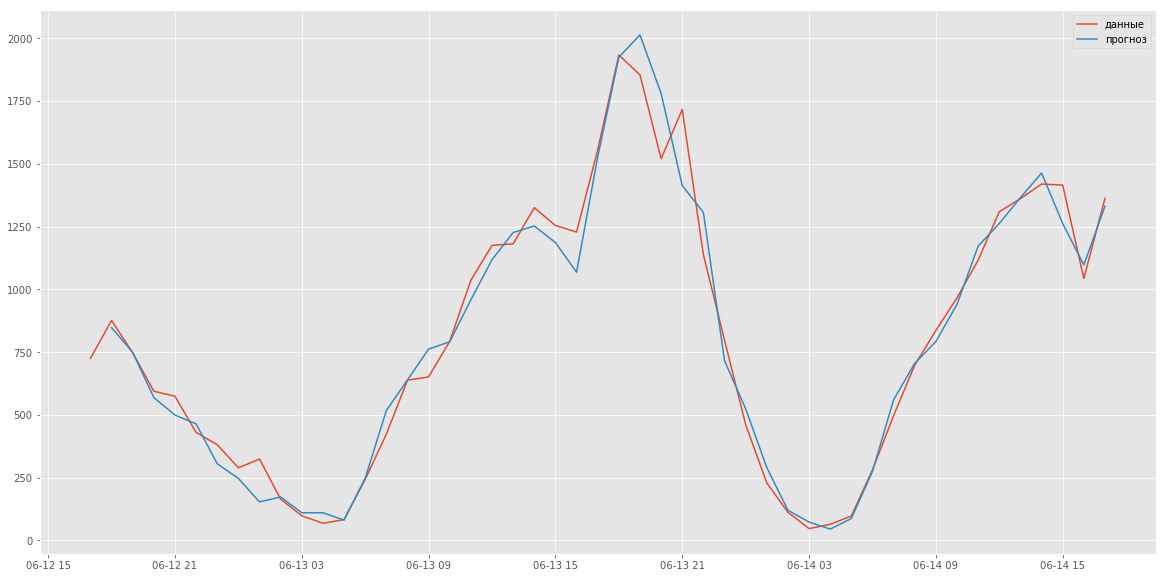

In [362]:
box = widgets.HBox([wg_region, wg_time_selector])
display.display(box)

In [305]:
wg_time_selector.readout??

In [280]:
wg_time_selector = widgets.SelectionSlider(
    options=list(trips_from_region.index.values.astype(str)),  
    description='Time ',
    index=(0,trips_from_region.shape[0]),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)
display.display(wg_time_selector)

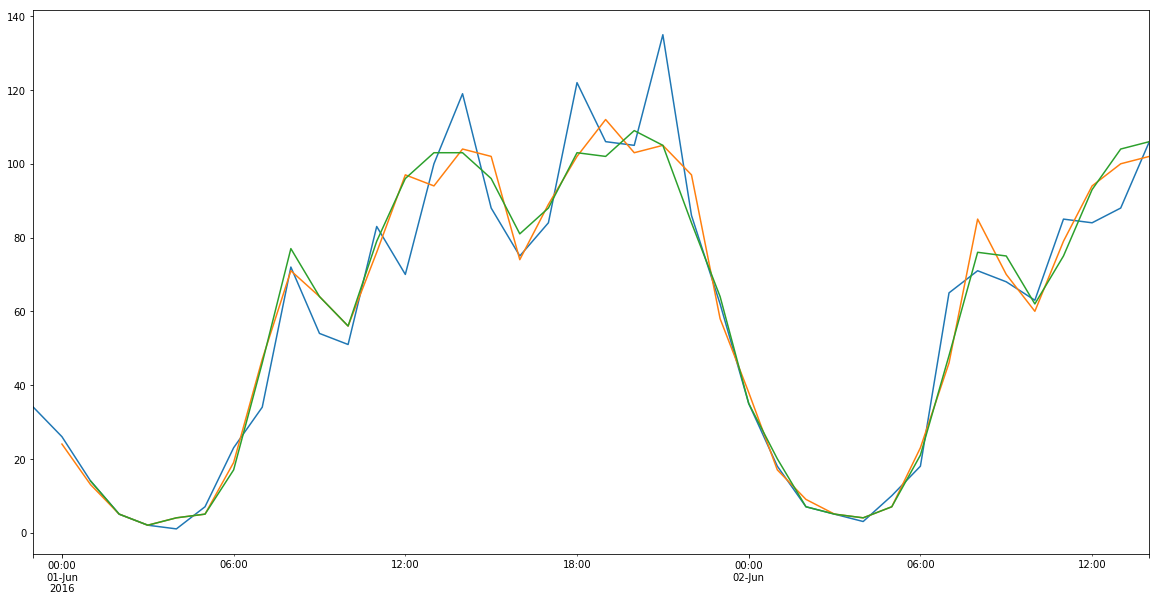

In [170]:
dt = pd.to_datetime('2016-06-01 14:00:00')
region = '1075'
start = dt - datetime.timedelta(hours = 24)
end = dt + datetime.timedelta(hours = 24)
fig = plt.Figure(figsize(20,10))
trips_from_region.loc[start:end, region].plot()
forecast.loc[start:end, region+'_1h'].shift(1).plot()
forecast.loc[start:end, region+'_2h'].shift(2).plot()

In [156]:
forecast.columns[0] == region + '_1h'

True

In [130]:
fig.add_subplot??